In [754]:
import pandas as pd
import numpy as np
import random as rnd
import os
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
os.listdir('../input')

['new_na2.csv']

In [755]:
train = pd.read_csv('../input/new_na2.csv')
smallE = np.e**-12

In [756]:
def regularization_mean_std_d(data_arr):
    mean = np.mean(data_arr)
    std = np.std(data_arr) 
    regularaz_arr = (data_arr - mean)/std
    return regularaz_arr

In [757]:
def regularization_log_d(data_arr):
    return np.log(data_arr)

In [758]:
def regularization_l2(data_arr):
    return (data_arr/ np.linalg.norm(data_arr))

In [759]:
train_v1 = train

bldng_us_clssfctn 우선 배제 및 id wnd_drctn, wnd 콜럼 중복으로 인한 드랍

In [760]:
train =train.drop(columns=['bldng_us_clssfctn','wnd'])
train =train.drop(columns=['id','dt_of_fr'])

In [761]:
train_v1 =train_v1.drop(columns=['bldng_us_clssfctn','wnd'])
train_v1 =train_v1.drop(columns=['id','dt_of_fr'])

In [762]:
train.head()

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,month,year,day,time
0,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1,0,...,0,1891,29231,11322,88,0,10,2017,20,5
1,N,단독주택,일반목구조,3,46.29,46.29,0.0,1961,1,0,...,0,4533,20480,3369,7727,0,9,2018,30,8
2,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2000,5,0,...,0,277,31197,12451,72,14,10,2016,30,14
3,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1,0,...,0,438,4270,407,508,11,6,2016,14,5
4,N,단독주택,일반목구조,2,0.00,0.00,0.0,1948,1,0,...,0,1702,29778,12487,707,0,4,2018,22,5


fr_yn => Y==1, N==0

In [763]:
binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)

In [764]:
for col in train.columns:
    null_count = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(null_count)

column:      fr_yn	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 0.00%
column: bldng_archtctr	 Percent of NaN value: 0.00%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 0.00%
column: ttl_grnd_flr	 Percent of NaN value: 0.00%
column: ttl_dwn_flr	 Percent of NaN value: 0.00%
column:     tmprtr	 Percent of NaN value: 0.00%
column:    prcpttn	 Percent of NaN value: 0.00%
column:    wnd_spd	 Percent of NaN value: 0.00%
column:  wnd_drctn	 Percent of NaN value: 0.00%
column:       hmdt	 Percent of NaN value: 0.00%
column: gas_engry_us_201401	 Percent of NaN value: 0.00%
column: ele_engry_us_201401	 Percent of NaN value: 0.00%
column: gas_engry_us_201402	 Percent of NaN value: 0.00%
column: ele_engry_us_201402	 Percent of NaN value: 0.00%
column: gas_engry_us_201403	 Percent of Na

column: ahsm_dstnc	 Percent of NaN value: 0.00%
column: no_tbc_zn_dstnc	 Percent of NaN value: 0.00%
column: bldng_cnt_in_50m	 Percent of NaN value: 0.00%
column:      month	 Percent of NaN value: 0.00%
column:       year	 Percent of NaN value: 0.00%
column:        day	 Percent of NaN value: 0.00%
column:       time	 Percent of NaN value: 0.00%


<h3>**건물용도분류명**</h3>

In [765]:
bldng_us_arr = train['bldng_us'].unique()

In [766]:
train['bldng_us'].value_counts()

단독주택          40044
제1종근린생활시설      3429
창고시설           3306
동.식물 관련시설      3213
제2종근린생활시설      2810
공장             1982
공동주택           1408
종교시설            424
교육연구시설          311
숙박시설            296
노유자시설           249
위험물저장및처리시설      223
자동차관련시설         197
업무시설            152
관광휴게시설          105
분뇨.쓰레기처리시설       87
판매시설             62
운동시설             60
문화및집회시설          59
묘지관련시설           43
위락시설             37
근린생활시설           34
의료시설             30
발전시설             26
교육연구및복지시설        23
방송통신시설           22
수련시설             21
교정및군사시설          16
운수시설             12
공공용시설             7
장례식장              3
파출소               1
판매및영업시설           1
시장                1
Name: bldng_us, dtype: int64

Text(0.5, 1.0, 'bldng_us')

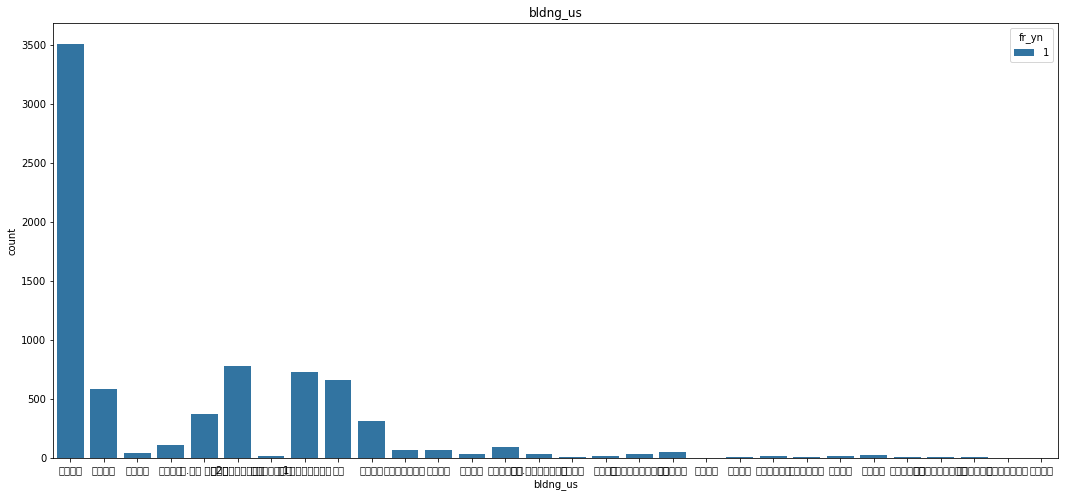

In [767]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_us',hue='fr_yn',data=train[train['fr_yn']==1])
plt.title("bldng_us")

In [768]:
bldng_us_one_hot = pd.get_dummies(train[train['fr_yn']==1]['bldng_us'])

In [769]:
bldng_us_cols = train['bldng_us'].unique()

In [770]:
bldng_us_cols

array(['단독주택', '공동주택', '종교시설', '공장', '동.식물 관련시설', '제1종근린생활시설', '숙박시설',
       '운수시설', '창고시설', '제2종근린생활시설', '교육연구시설', '문화및집회시설', '분뇨.쓰레기처리시설',
       '자동차관련시설', '업무시설', '판매시설', '위험물저장및처리시설', '노유자시설', '수련시설', '의료시설',
       '운동시설', '묘지관련시설', '위락시설', '관광휴게시설', '공공용시설', '방송통신시설', '교정및군사시설',
       '교육연구및복지시설', '발전시설', '장례식장', '근린생활시설', '시장', '판매및영업시설', '파출소'],
      dtype=object)

<h3>건물구조</h3>

In [771]:
train['bldng_archtctr'].value_counts()

일반목구조          14015
벽돌구조           13061
블록구조           10172
철근콘크리트구조        9639
경량철골구조          6748
일반철골구조          2971
강파이프구조           704
조적구조             673
기타조적구조           321
석구조               99
기타강구조             72
철골철근콘크리트구조        48
기타구조              48
목구조               43
철골콘크리트구조          41
통나무구조             20
프리케스트콘크리트구조       18
기타콘크리트구조           1
Name: bldng_archtctr, dtype: int64

Text(0.5, 1.0, 'bldng_archtctr')

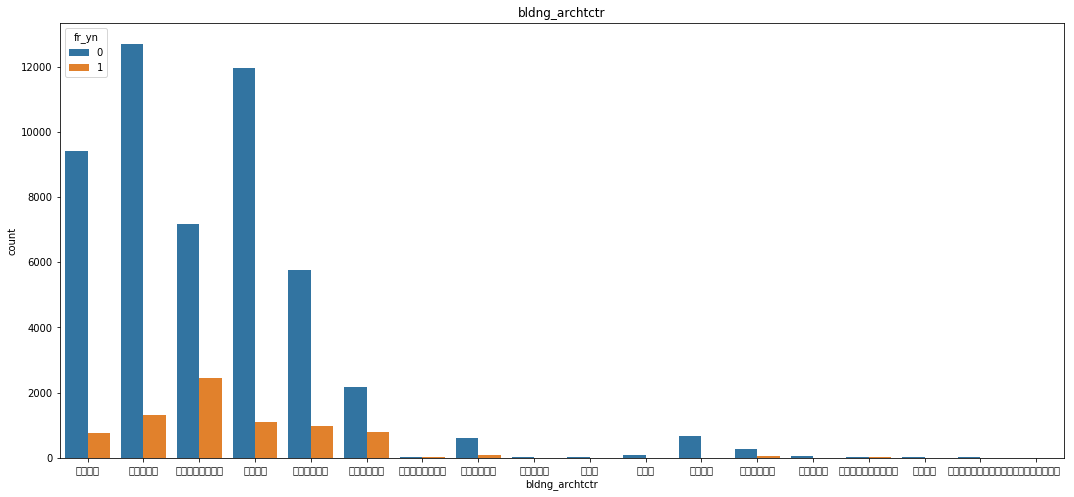

In [772]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_archtctr',hue='fr_yn',data=train)
plt.title("bldng_archtctr")

<h3>바람 방향</h3>

In [773]:
train['wnd_drctn'].value_counts()

0       6808
none    5074
360     3857
20      3554
250     3533
50      3429
290     3429
270     3344
340     3244
230     3193
200     2857
320     2654
70      2510
180     2353
110     2276
140     2262
160     2238
90      2076
30         1
40         1
10         1
Name: wnd_drctn, dtype: int64

Text(0.5, 1.0, 'wnd_drctn')

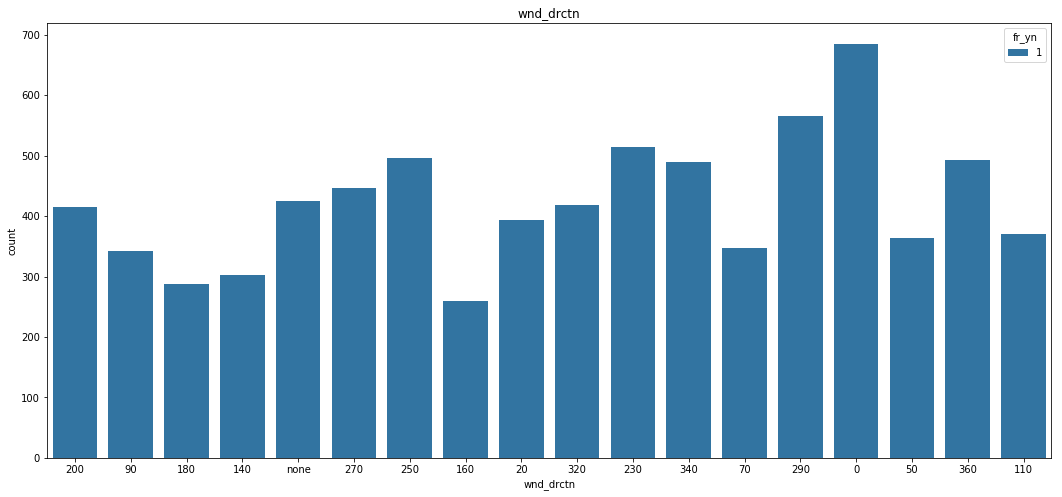

In [774]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('wnd_drctn',hue='fr_yn',data=train[train['fr_yn']==1])
plt.title("wnd_drctn")

In [775]:
train[train['fr_yn']==1]['wnd_drctn']
train_v1['wnd_drctn'].loc[train_v1['wnd_drctn']!='none'] = pd.to_numeric(train_v1['wnd_drctn'].loc[train_v1['wnd_drctn']!='none'])/90
train_v1.loc[train_v1['wnd_drctn']=='none']['wnd_drctn']=-1


In [776]:
train_v1['wnd_drctn'].loc[train_v1['wnd_drctn']!='none']

0         2.22222
1        0.222222
2               1
3               0
4               4
           ...   
58689           0
58690    0.222222
58691     2.55556
58692           4
58693     2.22222
Name: wnd_drctn, Length: 58694, dtype: object

In [777]:
train_v1['wnd_drctn'].head()

0     2.22222
1    0.222222
2           1
3           0
4           4
Name: wnd_drctn, dtype: object

<h3>풍향</h3>

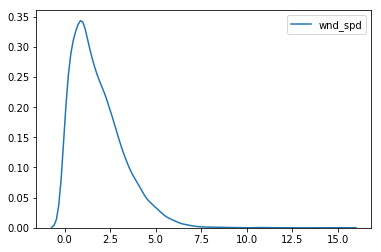

In [778]:
sns.kdeplot(train[train['fr_yn']==1]['wnd_spd'])

<h3>해당 지점에서 50미터 내의 빌딩 개수</h3>

Text(0.5, 1.0, 'bldng_cnt_in_50m')

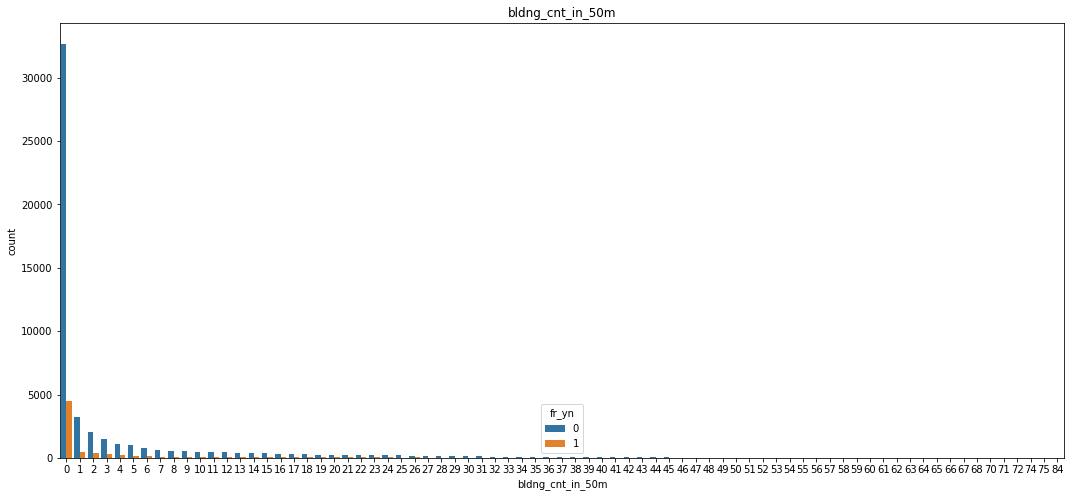

In [779]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_cnt_in_50m',hue='fr_yn',data=train)
plt.title("bldng_cnt_in_50m")

In [780]:
pd.crosstab(train['bldng_cnt_in_50m'],train['fr_yn']==1).style.background_gradient(cmap="summer_r")

fr_yn,False,True
bldng_cnt_in_50m,,
0,32683,4525
1,3265,496
2,2068,357
3,1515,291
4,1117,197
5,992,176
6,764,132
7,656,90
8,575,93


<h3>**금연 구역과의 거리 단위 미터**</h3>

In [781]:
#train['bldng_cnt_in_50m'] = regularization_mean_std_d(train['bldng_cnt_in_50m'])
train_v1['bldng_cnt_in_50m'] = regularization_log_d(train_v1['bldng_cnt_in_50m']+smallE)

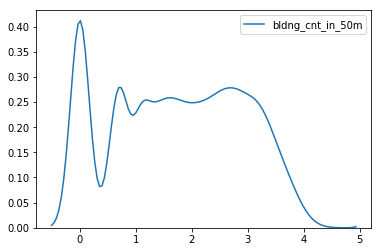

In [782]:
sns.kdeplot(regularization_log_d(train['bldng_cnt_in_50m']))

<h3>금연구역과의 최소거리</h3>

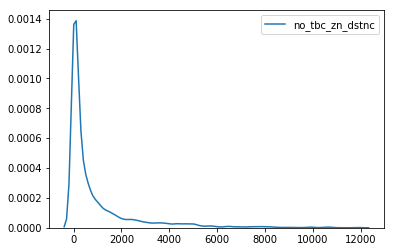

In [783]:
sns.kdeplot(train[train['fr_yn']==1]['no_tbc_zn_dstnc'])

In [784]:
train_v1['no_tbc_zn_dstnc']= regularization_mean_std_d(train_v1['no_tbc_zn_dstnc'])

<h3>안전 비상벨과의 거리</h3>

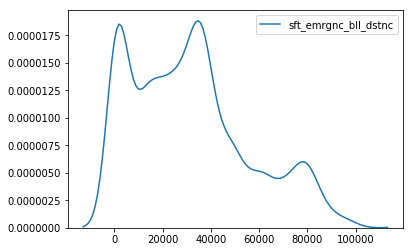

In [785]:
sns.kdeplot(train[train['fr_yn']==1]['sft_emrgnc_bll_dstnc'])

In [786]:
sft_emrgnc_bll_dstnc_arr = np.log(np.asarray(train[train['fr_yn']==1]['sft_emrgnc_bll_dstnc']))
train_v1['sft_emrgnc_bll_dstnc'] = np.log(train_v1['sft_emrgnc_bll_dstnc'])

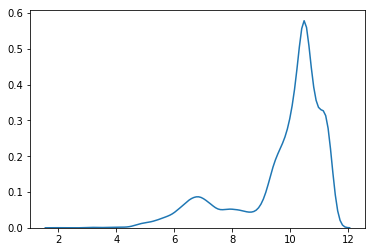

In [787]:
sns.kdeplot(sft_emrgnc_bll_dstnc_arr)

<h3>소화기와의 거리</h3>

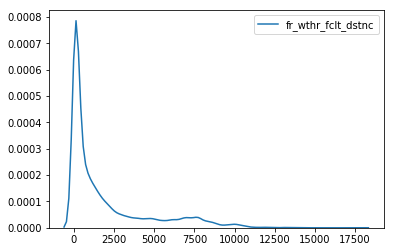

In [788]:
sns.kdeplot(train['fr_wthr_fclt_dstnc'])

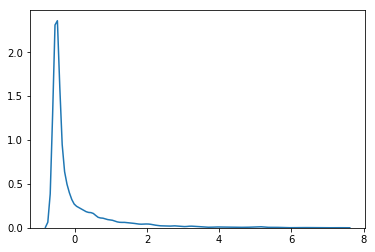

In [789]:
fr_wthr_fclt_dstnc_arr = (np.asarray(train[train['fr_yn']==1]['fr_wthr_fclt_dstnc']))
fr_wthr_fclt_dstnc_arr_d_s = regularization_mean_std_d(fr_wthr_fclt_dstnc_arr)
sns.kdeplot(fr_wthr_fclt_dstnc_arr_d_s)
train_v1['fr_wthr_fclt_dstnc'] = regularization_mean_std_d(train_v1['fr_wthr_fclt_dstnc'])

<h3>cctv_in_100m</h3>

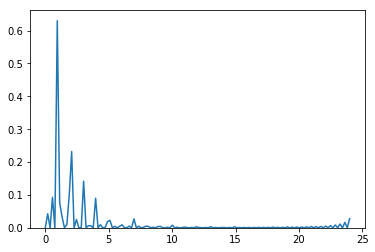

In [790]:
sns.kdeplot(np.asarray(train[train['fr_yn']==1]['cctv_in_100m']))

In [791]:
cctv_in_100m_reg_log =regularization_log_d(np.asarray(train[train['fr_yn']==1]['cctv_in_100m']))

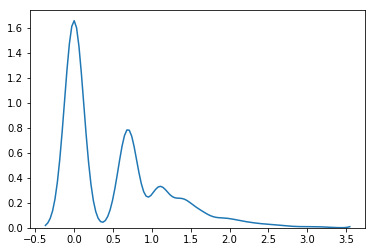

In [792]:
sns.kdeplot(cctv_in_100m_reg_log)
train_v1['cctv_in_100m'] = regularization_log_d(train_v1['cctv_in_100m']+smallE)

<h3>심장어쩌고와의 거리</h3>

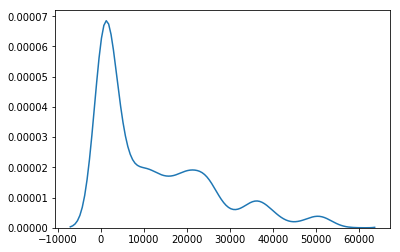

In [793]:
sns.kdeplot(np.asarray(train[train['fr_yn']==1]['ahsm_dstnc']))

In [794]:
ahsm_dstnc_mean_std_d = regularization_mean_std_d(train[train['fr_yn']==1]['ahsm_dstnc'])

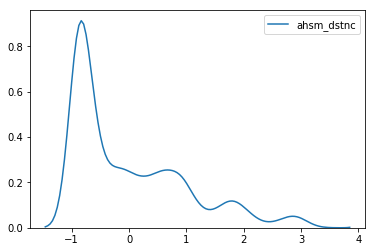

In [795]:
sns.kdeplot(ahsm_dstnc_mean_std_d)
train_v1['ahsm_dstnc'] = regularization_mean_std_d(train_v1['ahsm_dstnc'])

 <h3>다중이용시설 포함 여부</h3>

In [796]:
#binary_y = {'N': 0, 'Y': 1}
train['mlt_us_yn'] = train['mlt_us_yn'].map(binary_y)

Text(0.5, 1.0, 'mlt_us_yn')

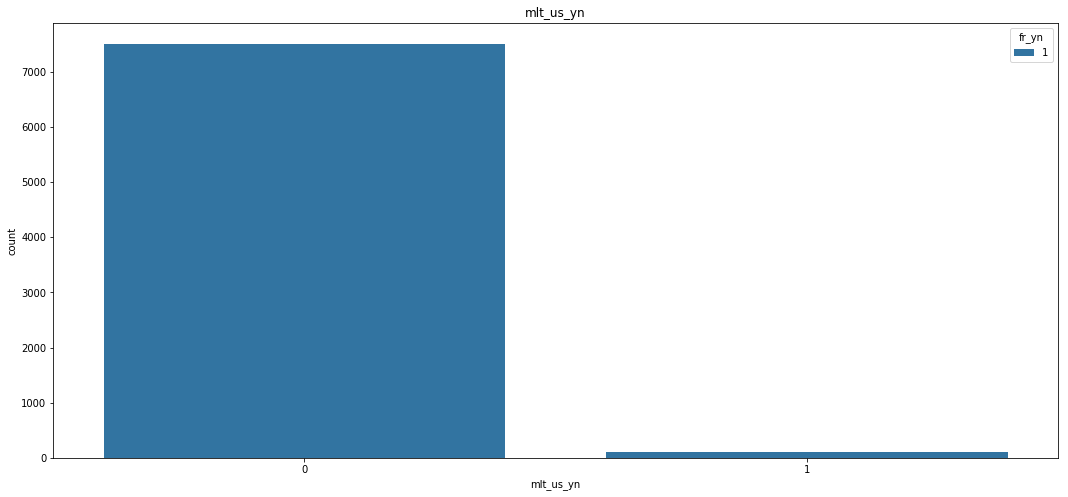

In [797]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('mlt_us_yn',hue='fr_yn',data=train[train['fr_yn']==1])
plt.title("mlt_us_yn")

<h3>소방서 관할 인원</h3>

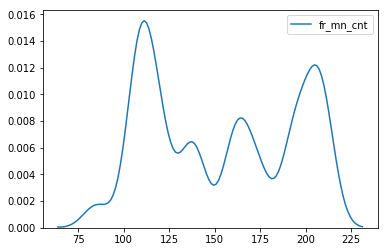

In [798]:
#train['fr_mn_cnt'].head()
sns.kdeplot(train[train['fr_yn']==1]['fr_mn_cnt'])

In [799]:
fr_mn_cn_log = regularization_log_d(train[train['fr_yn']==1]['fr_mn_cnt'])

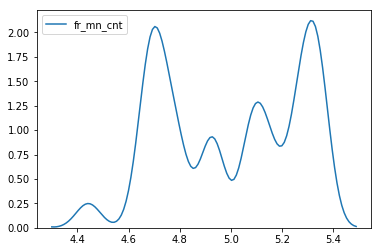

In [800]:
sns.kdeplot(fr_mn_cn_log)

<h3>토지 면적</h3>

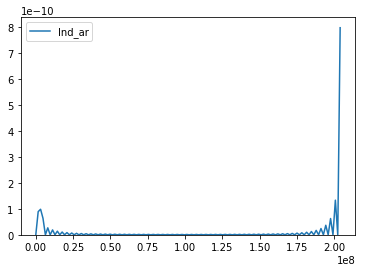

In [801]:
sns.kdeplot(train[train['fr_yn']==1]['lnd_ar'])

In [802]:
lnd_ar_cos_d = np.cos(train['lnd_ar'])

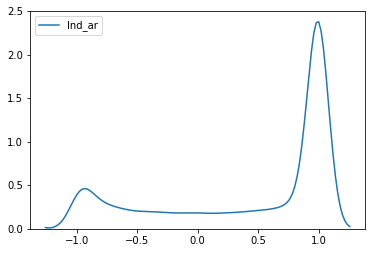

In [803]:
sns.kdeplot(lnd_ar_cos_d)
train_v1['lnd_ar'] = np.cos(train_v1['lnd_ar'])

<h3>건물연면적</h3>

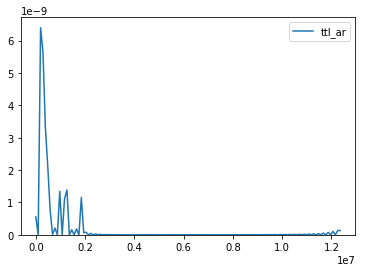

In [804]:
sns.kdeplot(train['ttl_ar'])

In [805]:
train_v1['ttl_ar'] =  regularization_log_d(train_v1['ttl_ar'] +smallE)

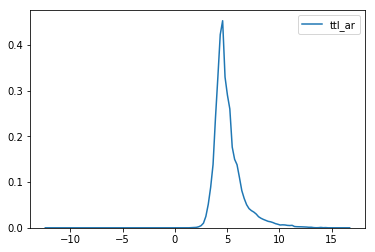

In [806]:
sns.kdeplot(train_v1['ttl_ar'])

<h3>건축면적</h3>

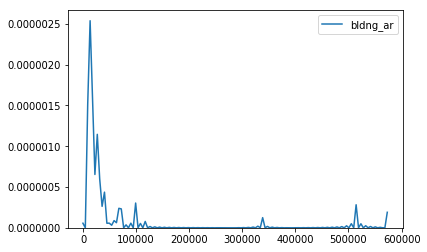

In [807]:
sns.kdeplot(train[train['fr_yn']==1]['bldng_ar'])

In [808]:
bldng_ar_log_d = regularization_log_d(train['bldng_ar'])

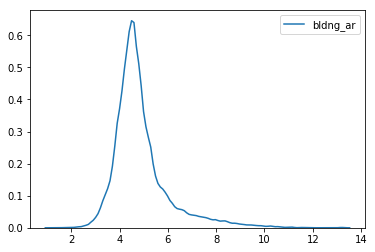

In [809]:
sns.kdeplot(bldng_ar_log_d)
train_v1['bldng_ar'] = regularization_log_d(train_v1['bldng_ar']+ smallE)

<h3>담배소매점과의 거리</h3>

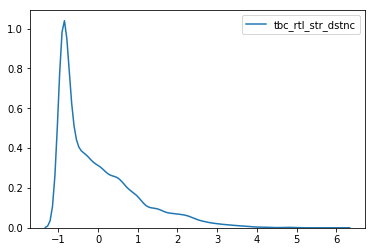

In [810]:
sns.kdeplot(regularization_mean_std_d(train['tbc_rtl_str_dstnc']))
train_v1['tbc_rtl_str_dstnc'] = regularization_mean_std_d(train_v1['tbc_rtl_str_dstnc'])

<h3>년도와 건물 승인 일자</h3>

In [811]:
train_v1['year']= pd.to_numeric(train_v1['year']) - 2000
train_v1['dt_of_athrztn']= pd.to_numeric(train_v1['dt_of_athrztn']) - 2000

In [812]:
train.iloc[43]

fr_yn                   0
bldng_us             단독주택
bldng_archtctr       벽돌구조
bldng_cnt               2
bldng_ar            82.98
                    ...  
bldng_cnt_in_50m        0
month                  11
year                 2016
day                    15
time                    9
Name: 43, Length: 159, dtype: object

In [813]:
train_v1[:50]

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,month,year,day,time
0,Y,단독주택,블록구조,3,4.240175,4.240175,1.000000,-23,1,0,...,-12.000000,-0.319289,10.282985,0.250050,-0.587150,-12.000000,10,17,20,5
1,N,단독주택,일반목구조,3,3.834926,3.834926,1.000000,-39,1,0,...,-12.000000,0.481158,9.927204,-0.450421,4.042287,-12.000000,9,18,30,8
2,Y,공동주택,철근콘크리트구조,1,6.369558,7.830728,0.646827,0,5,0,...,-12.000000,-0.808283,10.348077,0.349488,-0.596847,2.639058,10,16,30,14
3,N,단독주택,일반목구조,2,3.890186,3.890186,1.000000,-64,1,0,...,-12.000000,-0.759505,8.359369,-0.711303,-0.332619,2.397896,6,16,14,5
4,N,단독주택,일반목구조,2,-12.000000,-12.000000,1.000000,-52,1,0,...,-12.000000,-0.376550,10.301525,0.352658,-0.212020,-12.000000,4,18,22,5
5,Y,단독주택,철근콘크리트구조,1,4.571200,5.004215,-0.584233,15,2,0,...,-12.000000,-0.460473,10.299205,0.282462,-0.515639,-12.000000,4,18,21,15
6,N,단독주택,블록구조,1,4.430817,4.430817,0.197843,-18,1,0,...,-12.000000,0.055485,10.279112,-0.071077,0.334616,-12.000000,9,15,2,1
7,N,단독주택,벽돌구조,6,4.521789,4.522223,1.000000,-6,1,0,...,-12.000000,-0.301111,10.429074,0.418716,-0.219292,-12.000000,3,18,3,23
8,N,단독주택,벽돌구조,8,4.628496,4.628496,1.000000,-7,1,0,...,-12.000000,-0.528338,10.321507,0.095300,-0.323529,1.609439,3,18,4,8
9,N,단독주택,일반목구조,4,4.191623,4.191623,1.000000,-53,1,0,...,-12.000000,0.176673,10.200030,0.185402,-0.559879,-12.000000,12,14,8,5
